In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df_sales = pd.read_csv('../Data/SalesData.csv', delimiter=',', header='infer', encoding='latin-1')

In [3]:
df_sales.head(5)

,Date,Month,Quarter,Year,Qty,Product,Category,Pharmacy,Location
0,1-11-2015,11,4,2015,2,Injection 14,Skinbooster,Pharmacy 1,London
1,1-11-2015,11,4,2015,1,Injection 14,Skinbooster,Pharmacy 1,London
2,1-11-2015,11,4,2015,1,Injection 1,Dermafiller,Pharmacy 2,Outside London M25
3,1-11-2015,11,4,2015,1,Injection 2,Dermafiller,Pharmacy 2,Outside London M25
4,1-11-2015,11,4,2015,4,Injection 14,Skinbooster,Pharmacy 2,"NorthEast, Midlands"


## Histograms

Text(0.5, 1.0, 'Location Count')

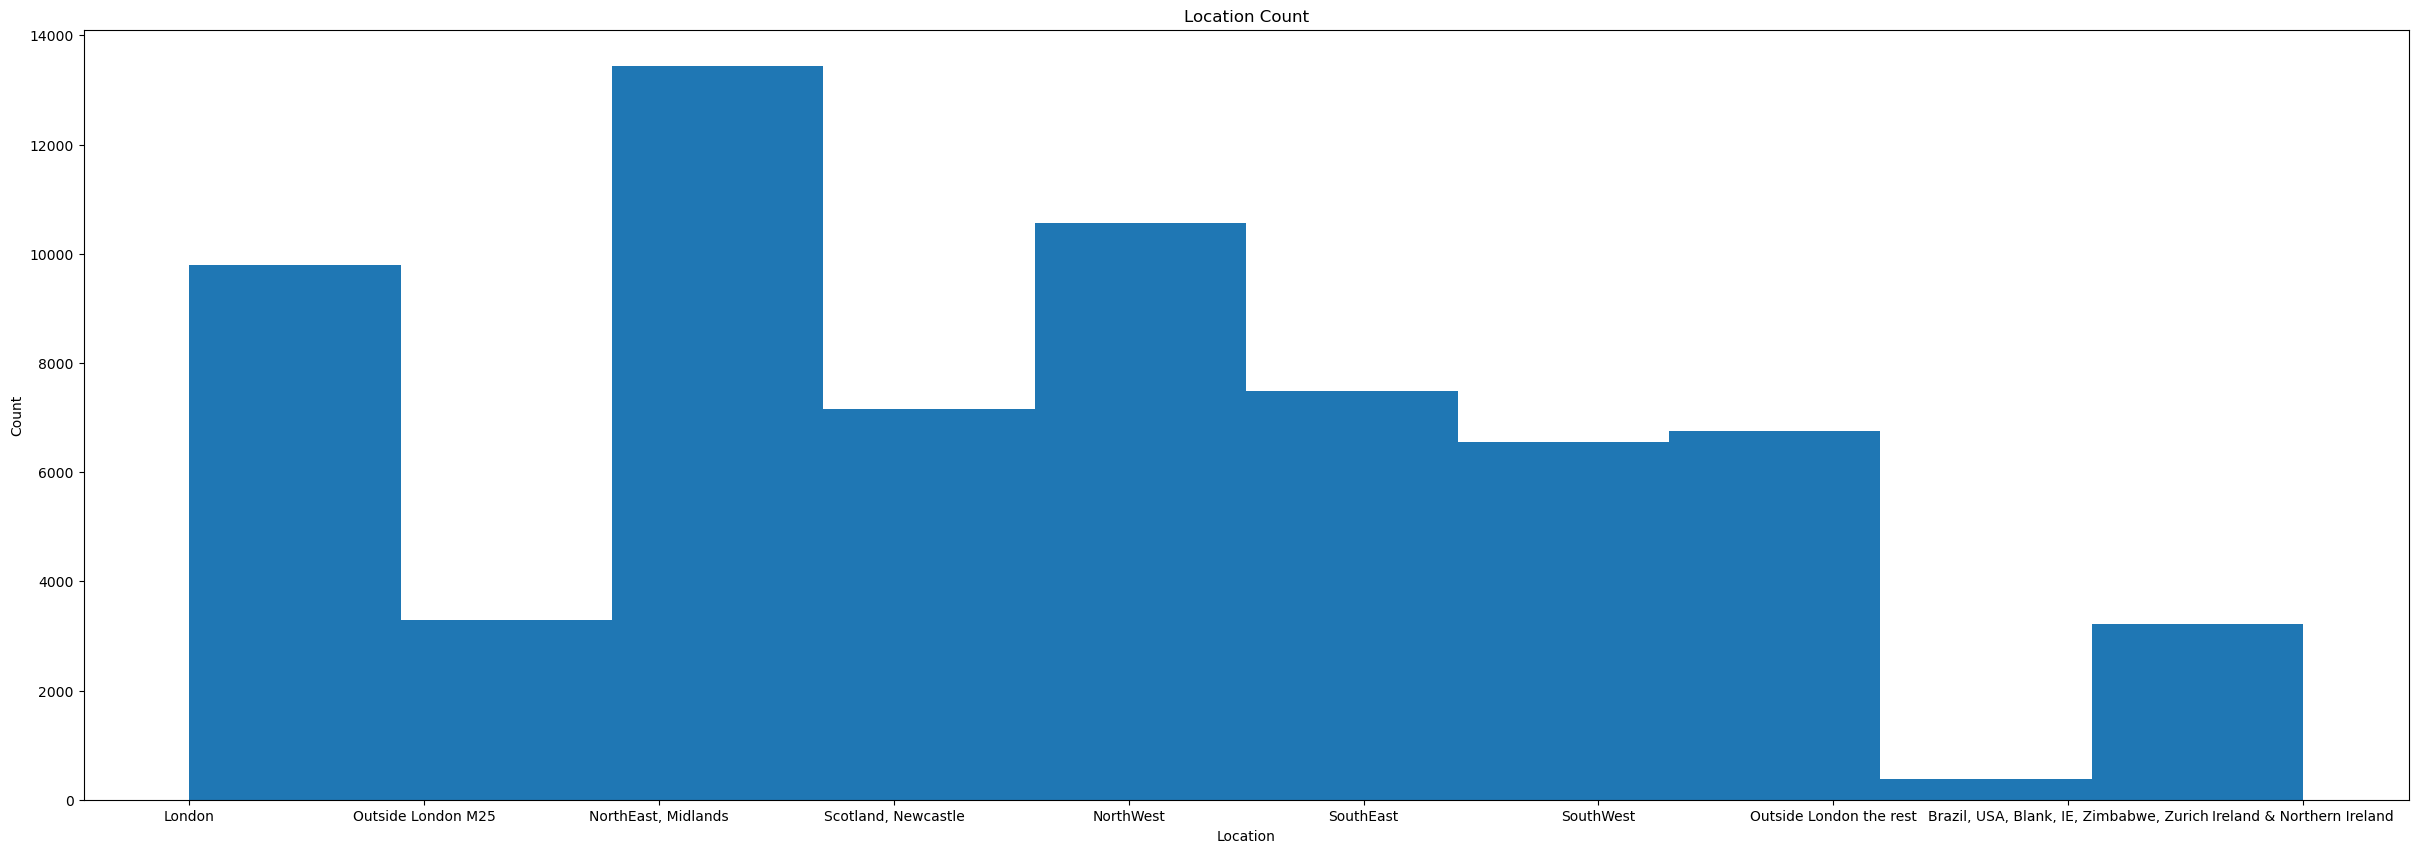

In [4]:
plt.figure(figsize=(30,10))
plt.hist(df_sales.Location)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Location Count")

Text(0.5, 1.0, 'Product Count')

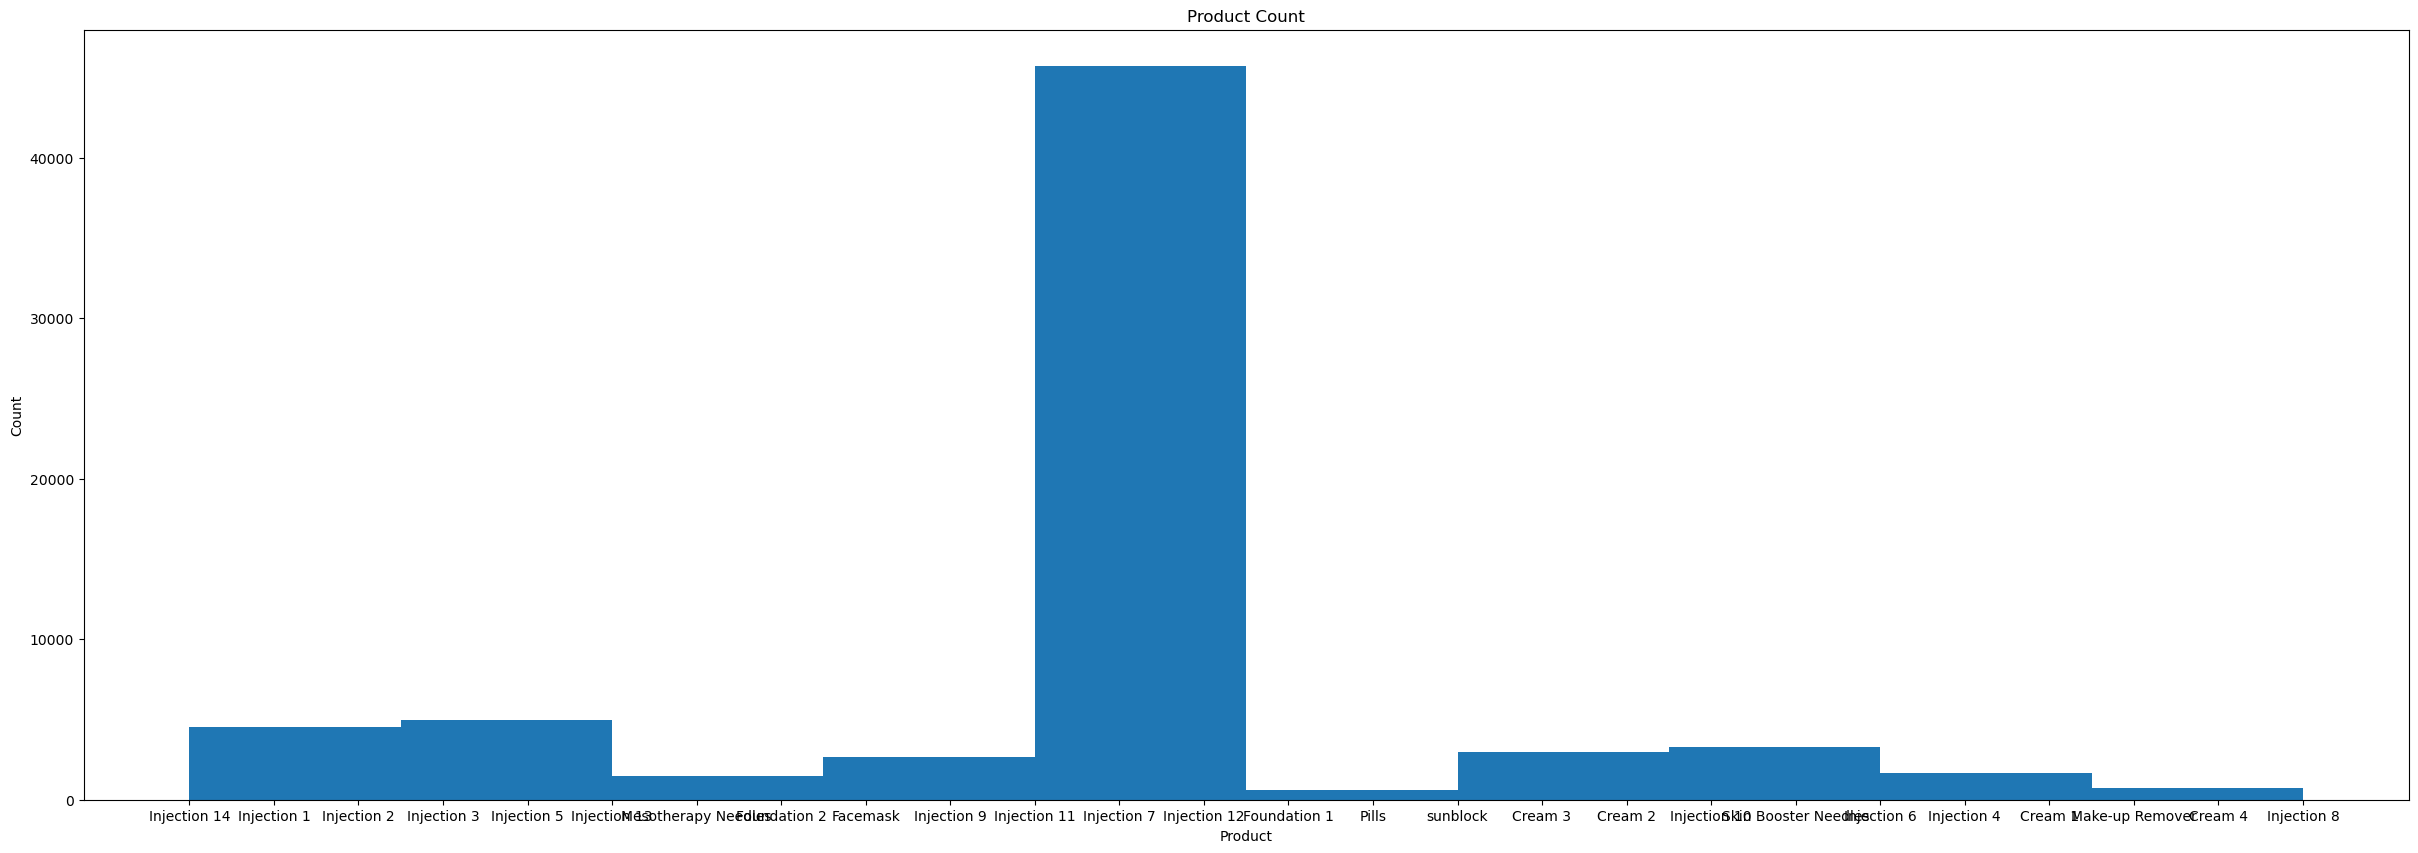

In [5]:
plt.figure(figsize=(30,10))
plt.hist(df_sales.Product)
plt.xlabel("Product")
plt.ylabel("Count")
plt.title("Product Count")

Text(0.5, 1.0, 'Category Distribution')

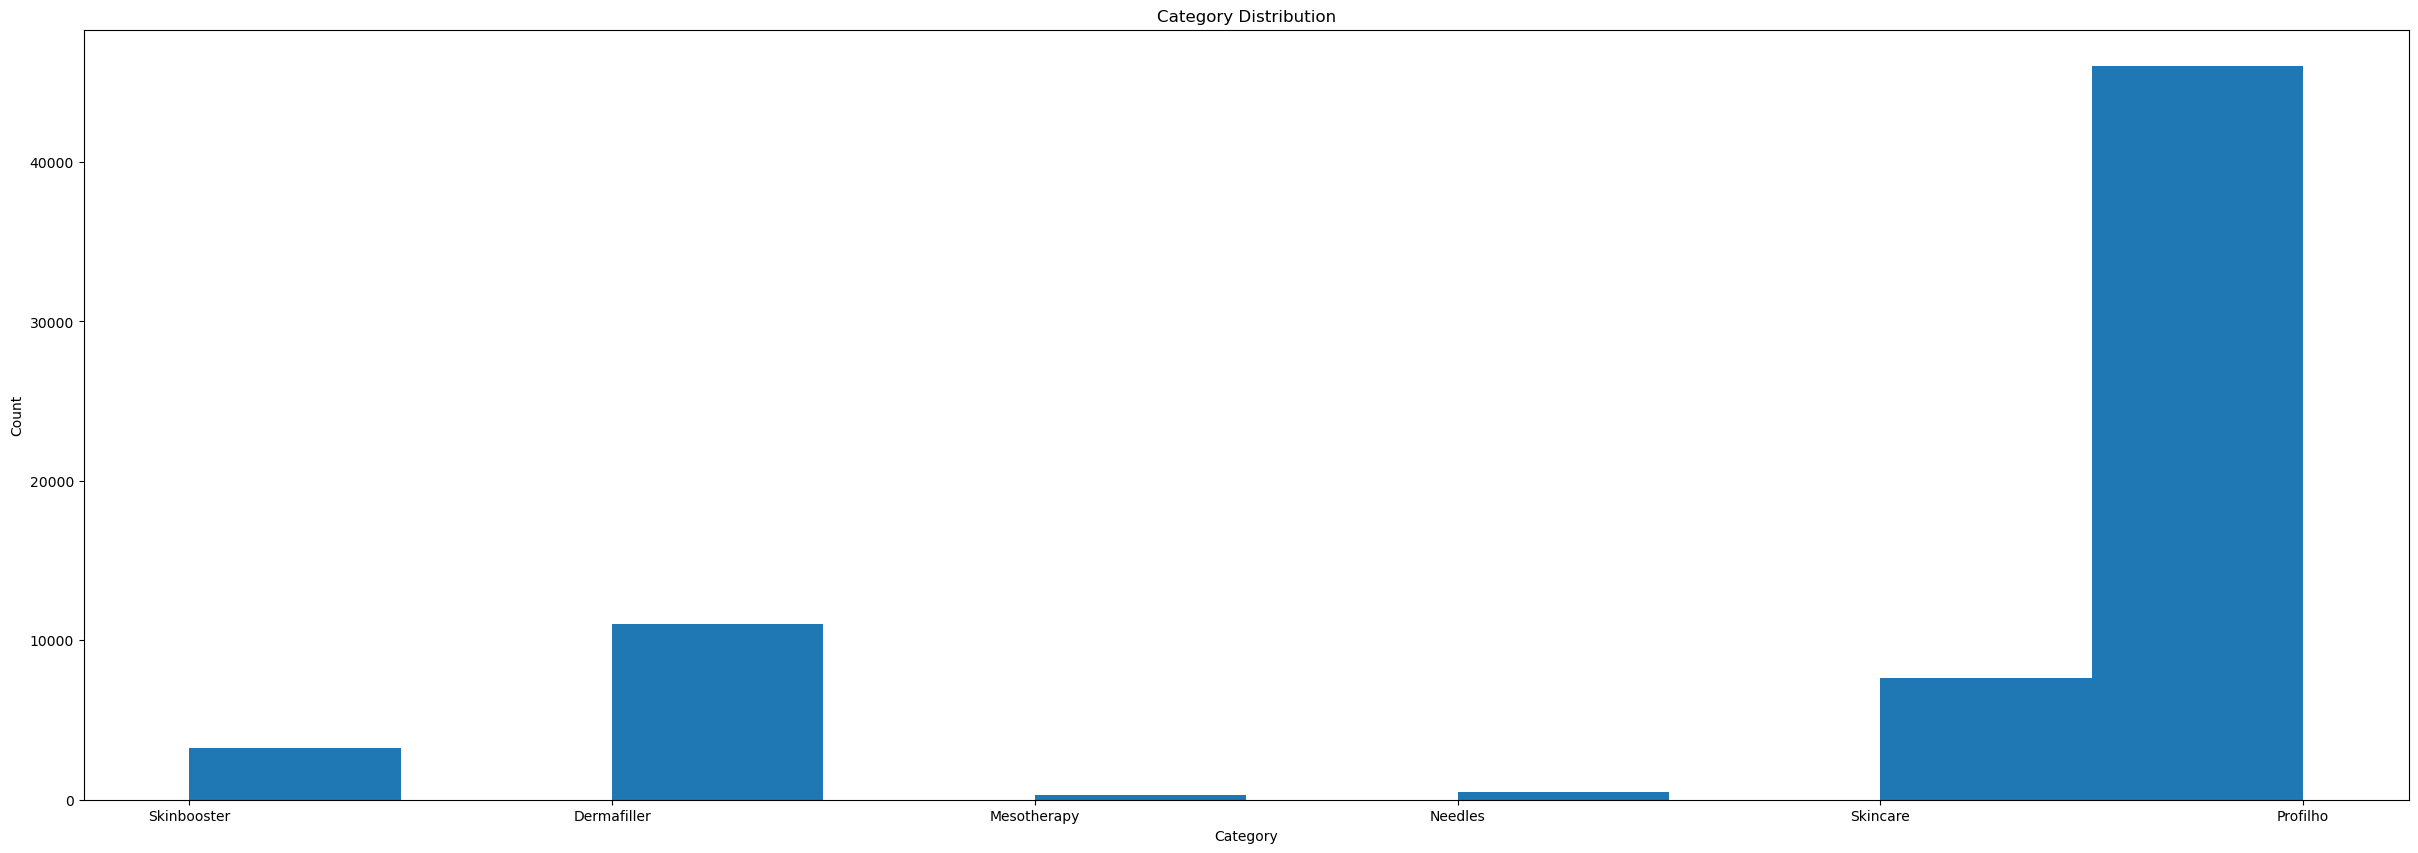

In [6]:
plt.figure(figsize=(30,10))
plt.hist(df_sales.Category)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution")

Text(0.5, 1.0, 'Pharmacy Distribution')

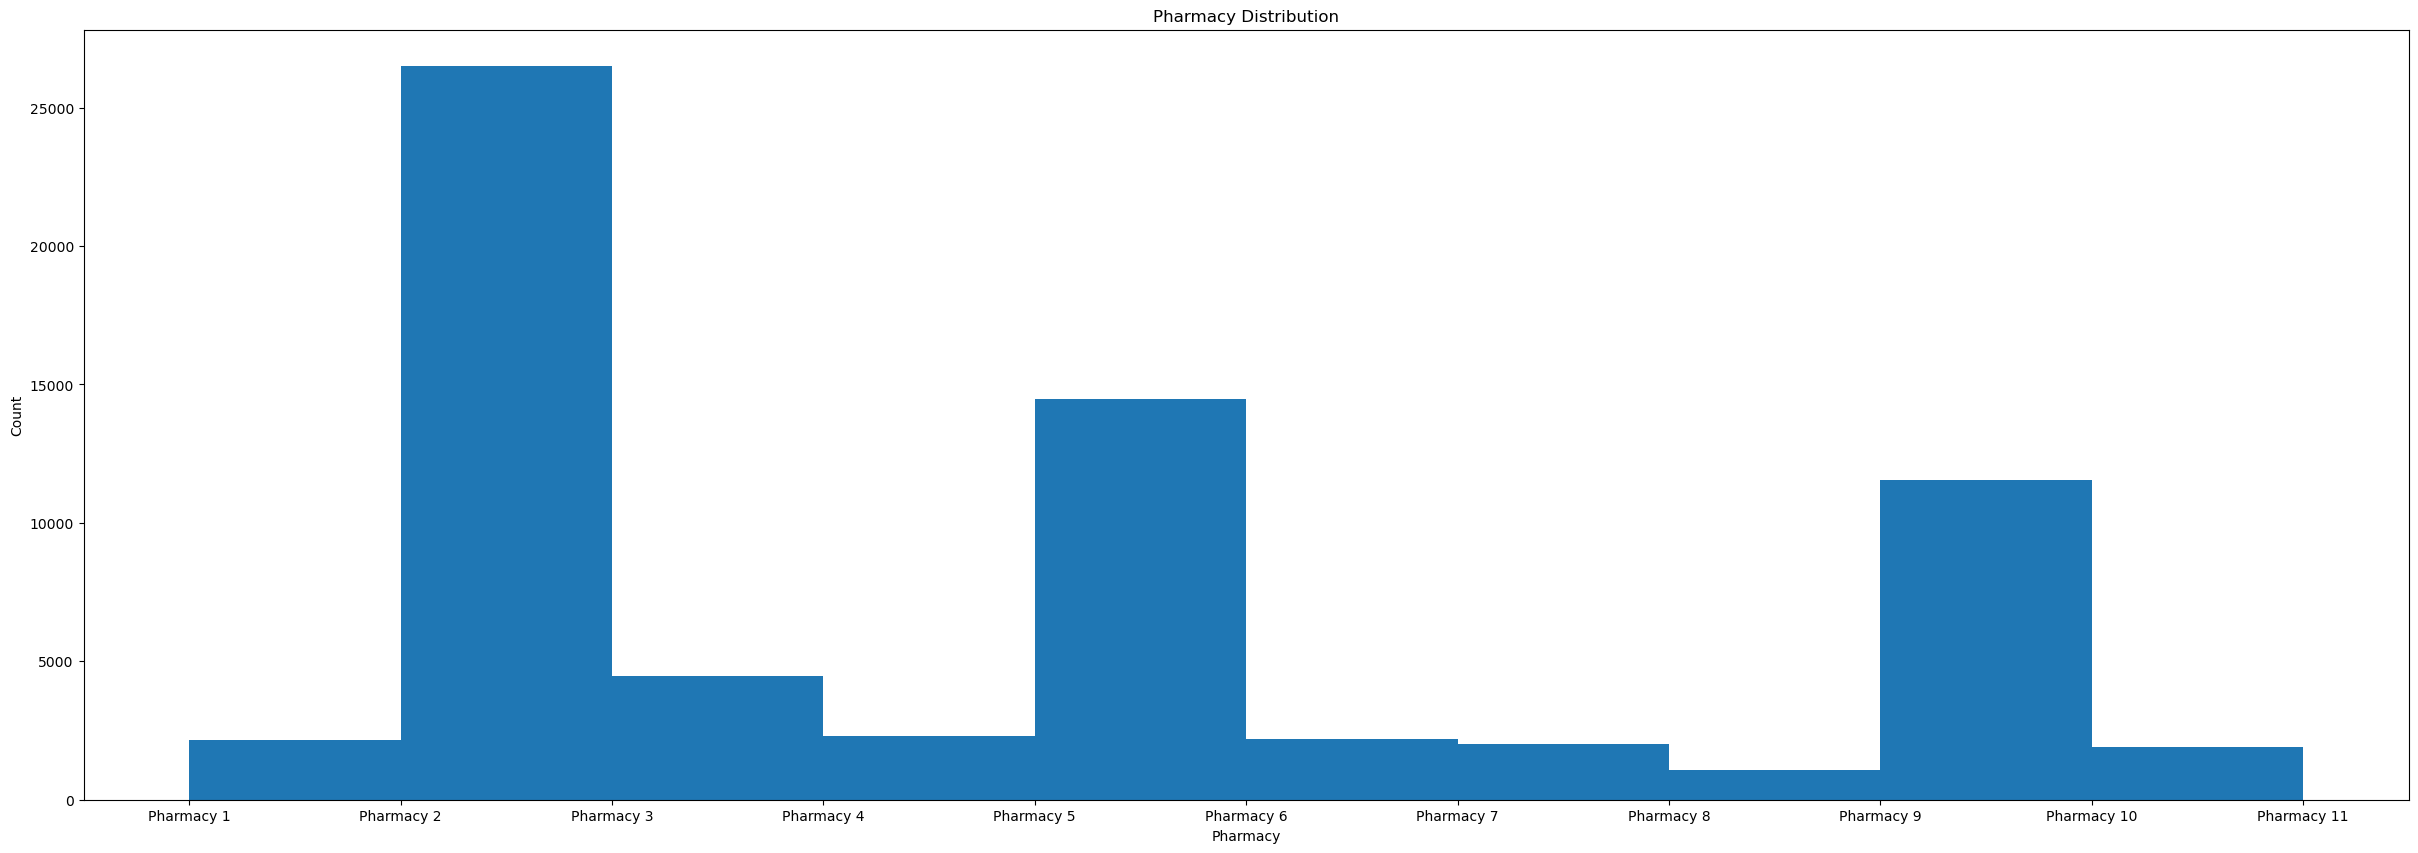

In [7]:
plt.figure(figsize=(30,10))
plt.hist(df_sales.Pharmacy)
plt.xlabel("Pharmacy")
plt.ylabel("Count")
plt.title("Pharmacy Distribution")

## Boxplots

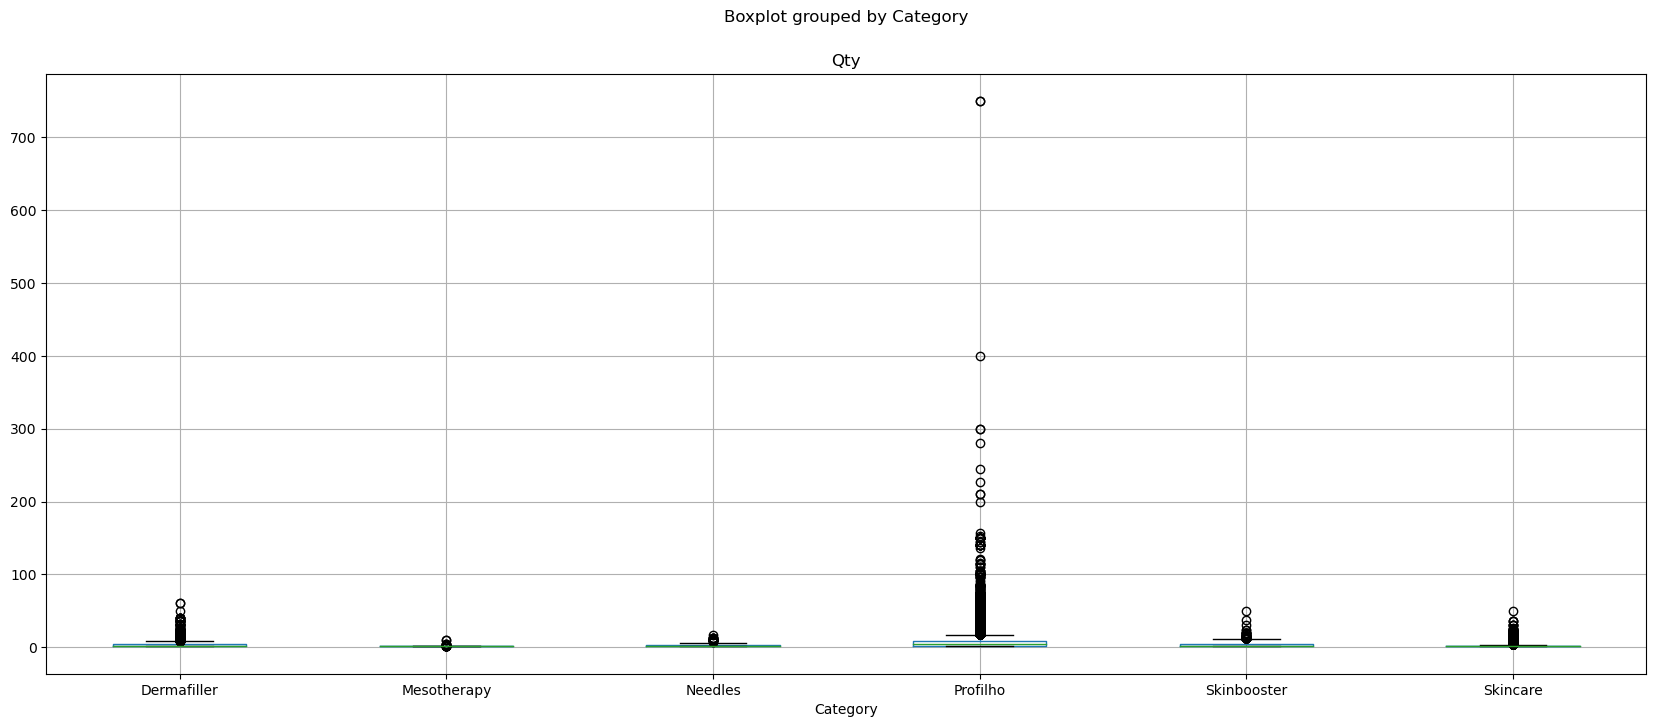

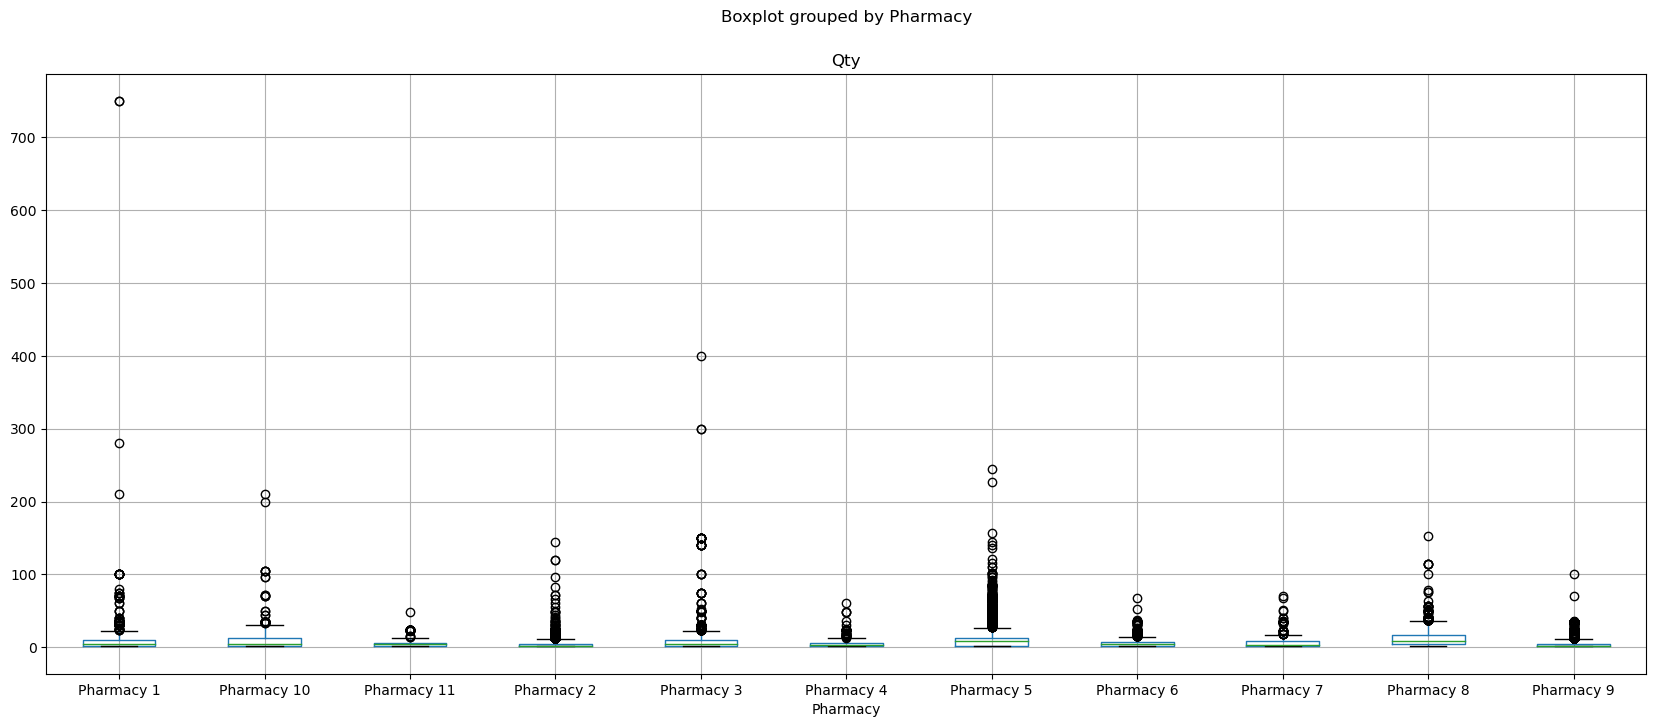

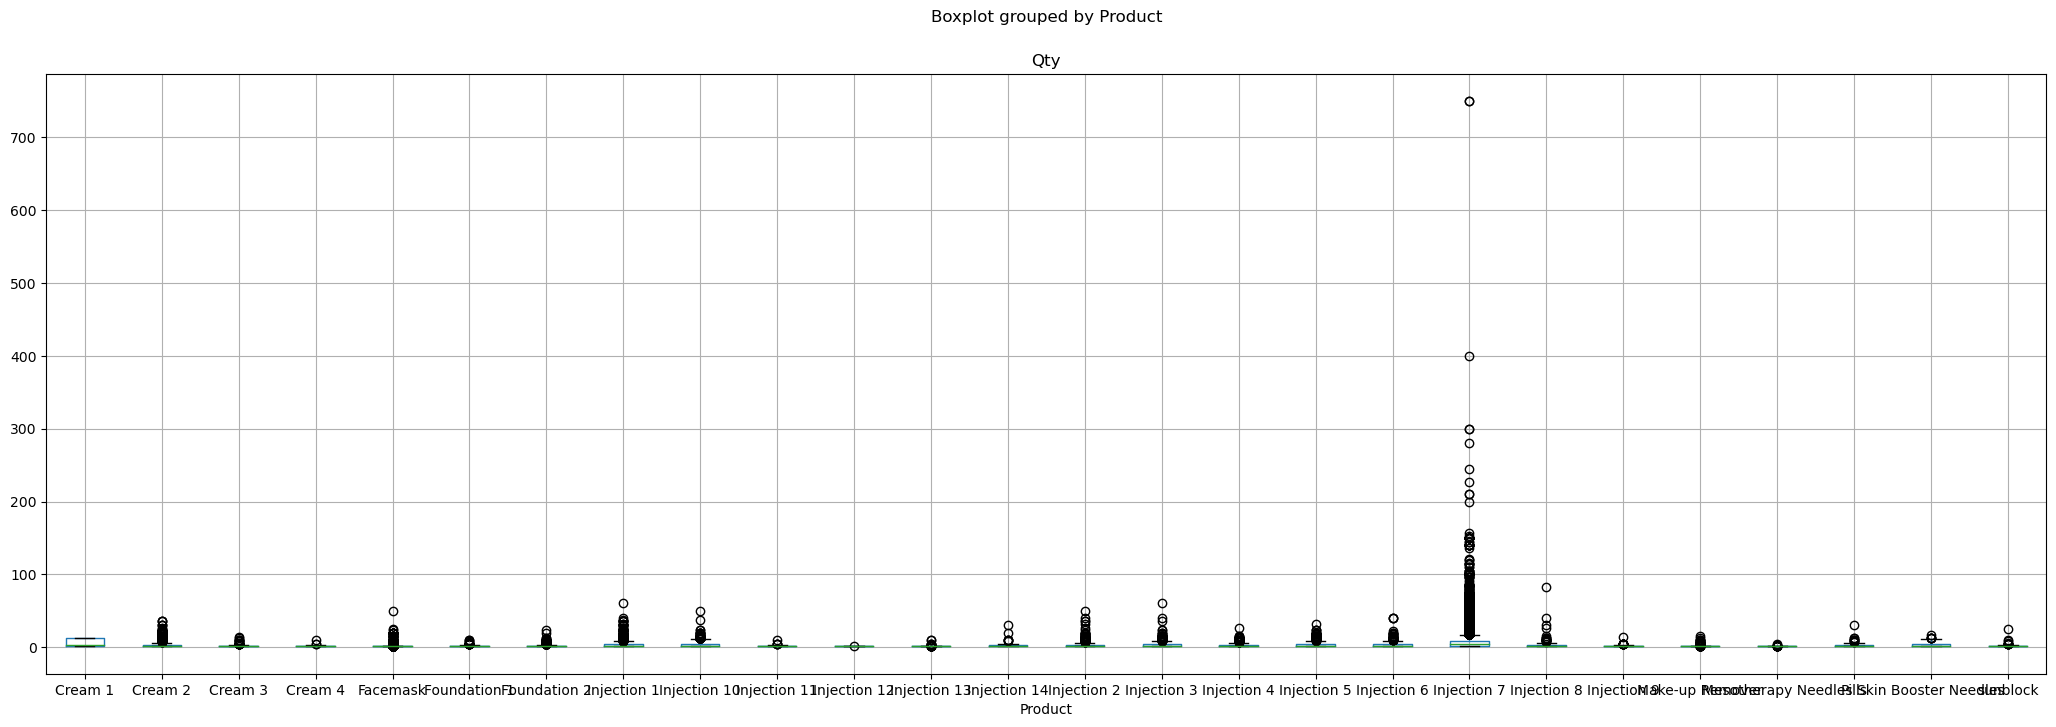

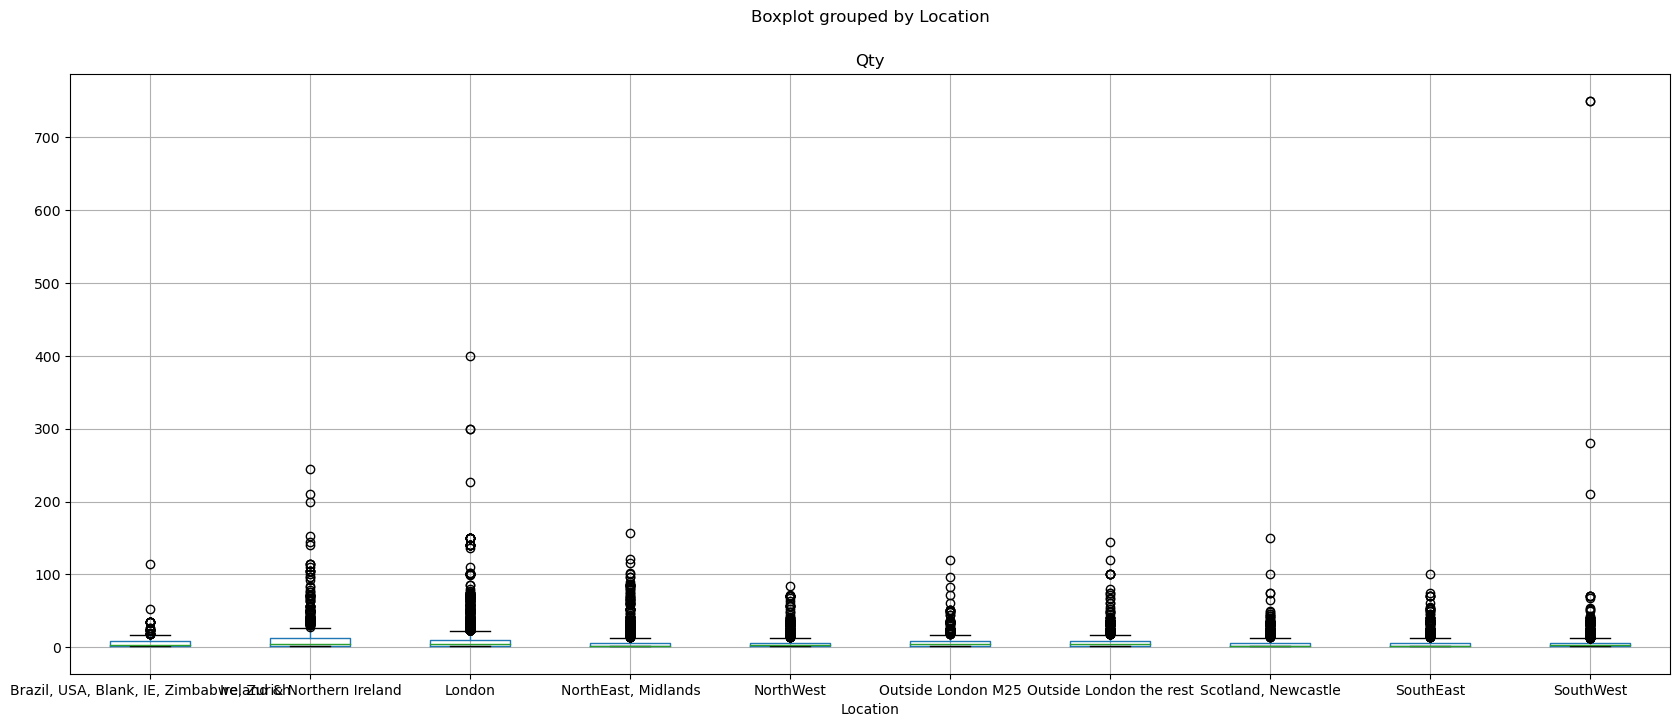

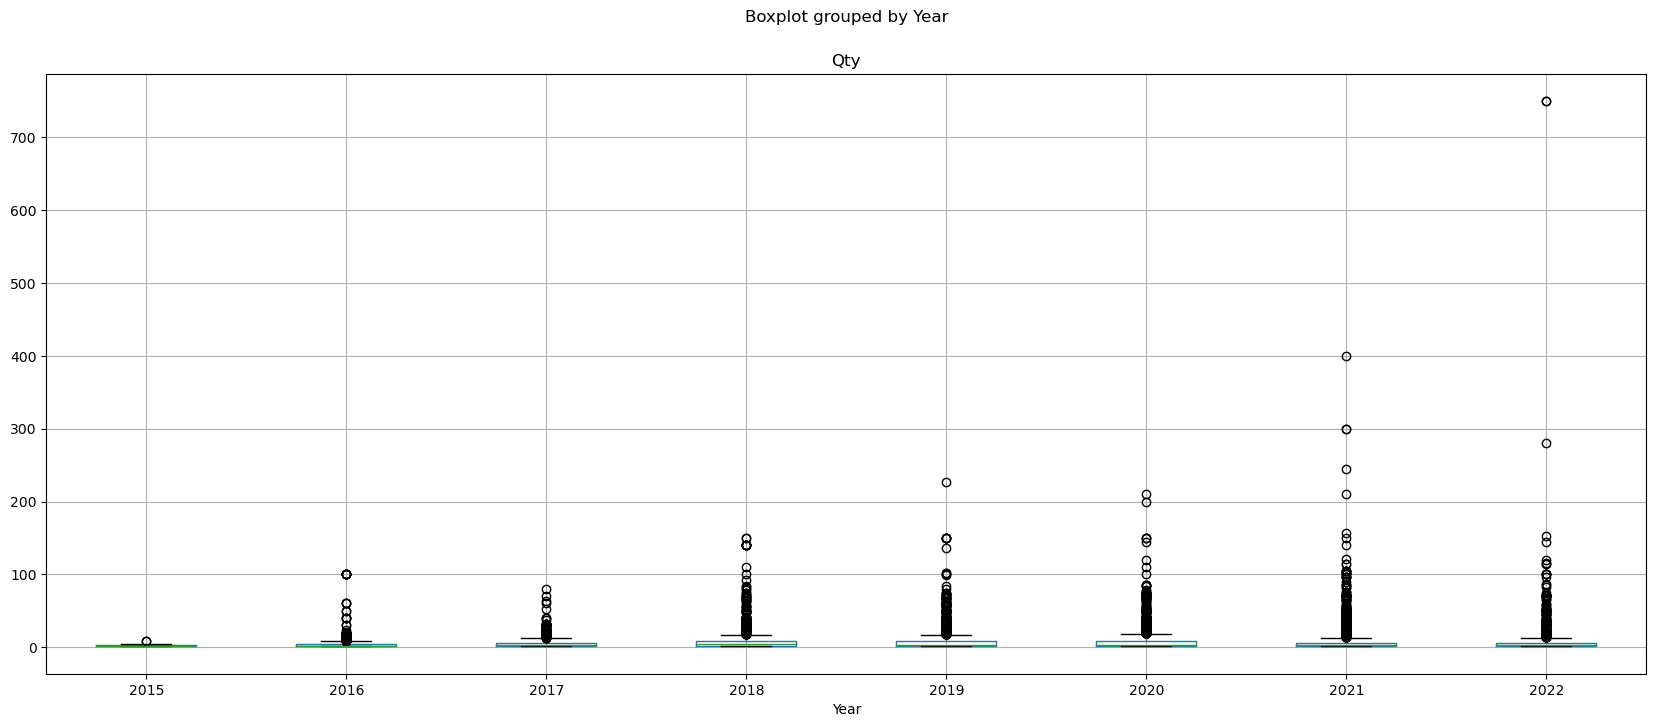

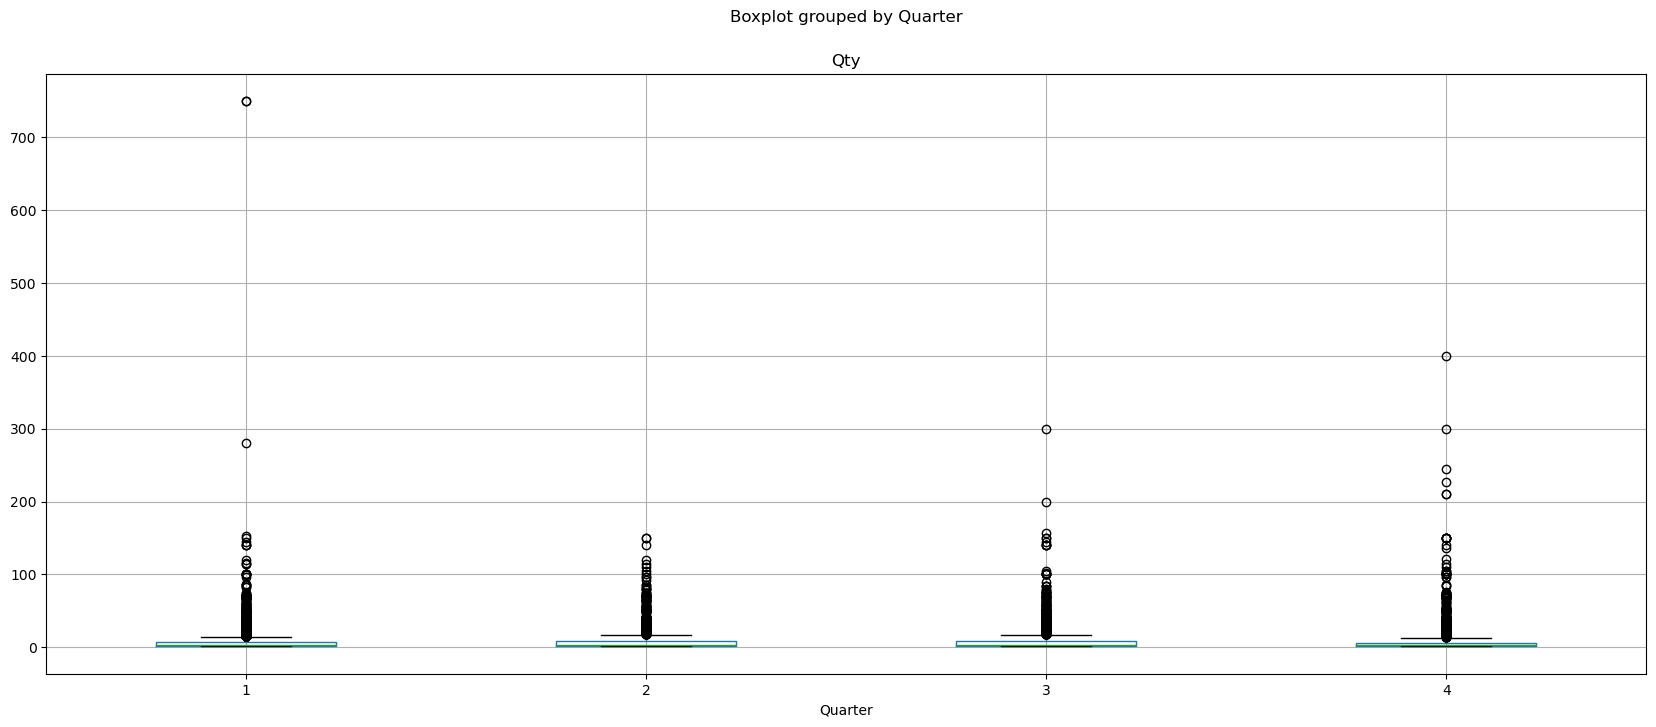

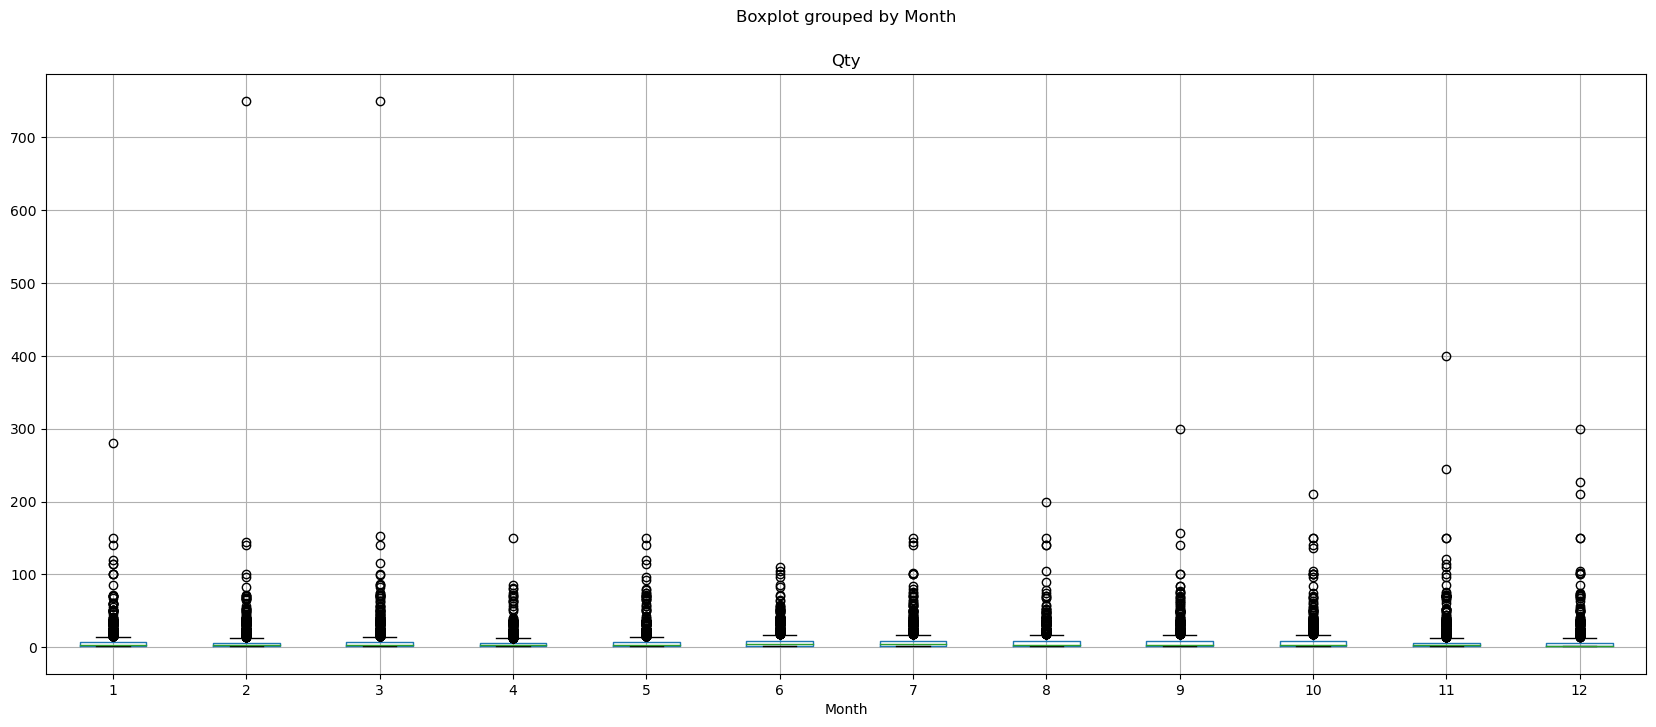

In [8]:
df_sales.boxplot('Qty', by='Category', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Pharmacy', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Product', figsize=(25,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Location', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Year', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Quarter', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Month', figsize=(20,8))
plt.title('Qty')
plt.show()

## Pie Charts

C:\Users\galea\AppData\Local\Temp\ipykernel_712\2899808576.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales_products = df_sales.groupby(['Product']).sum().plot(kind='pie', y='Qty', autopct='%1.0f%%', legend=None, figsize=(15,15))


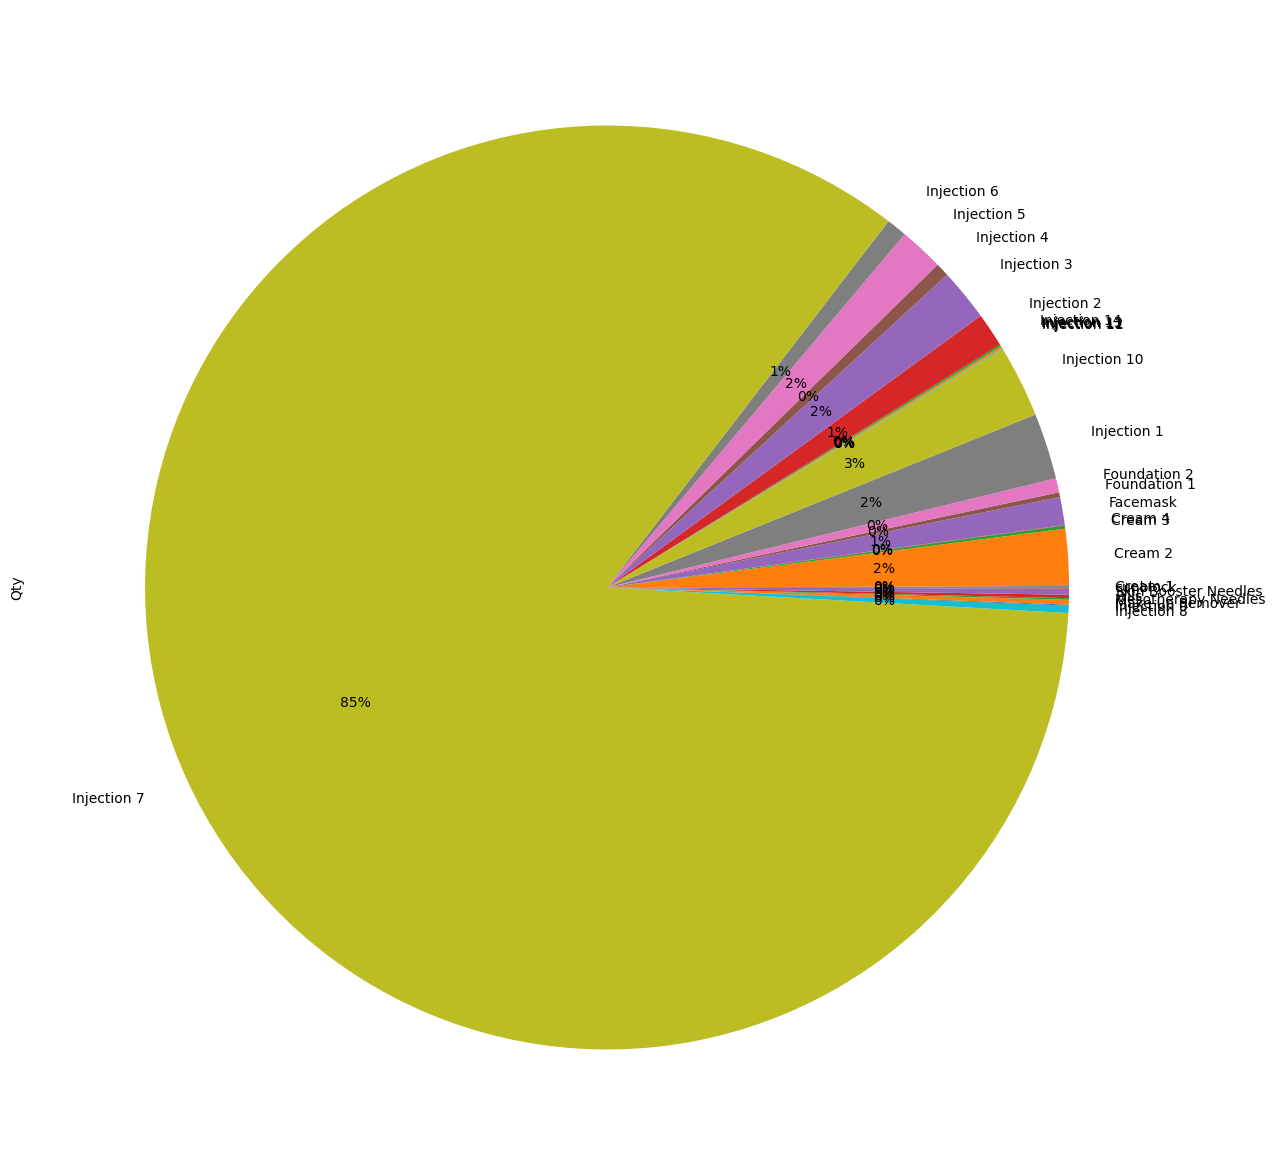

In [9]:

df_sales_products = df_sales.groupby(['Product']).sum().plot(kind='pie', y='Qty', autopct='%1.0f%%', legend=None, figsize=(15,15))

# fig, ax = plt.subplots()
# ax.pie(df_sales.Location)

C:\Users\galea\AppData\Local\Temp\ipykernel_712\2629649559.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales_products = df_sales.groupby(['Category']).sum().plot(kind='pie', y='Qty', autopct='%1.0f%%', legend=None, figsize=(15,15))


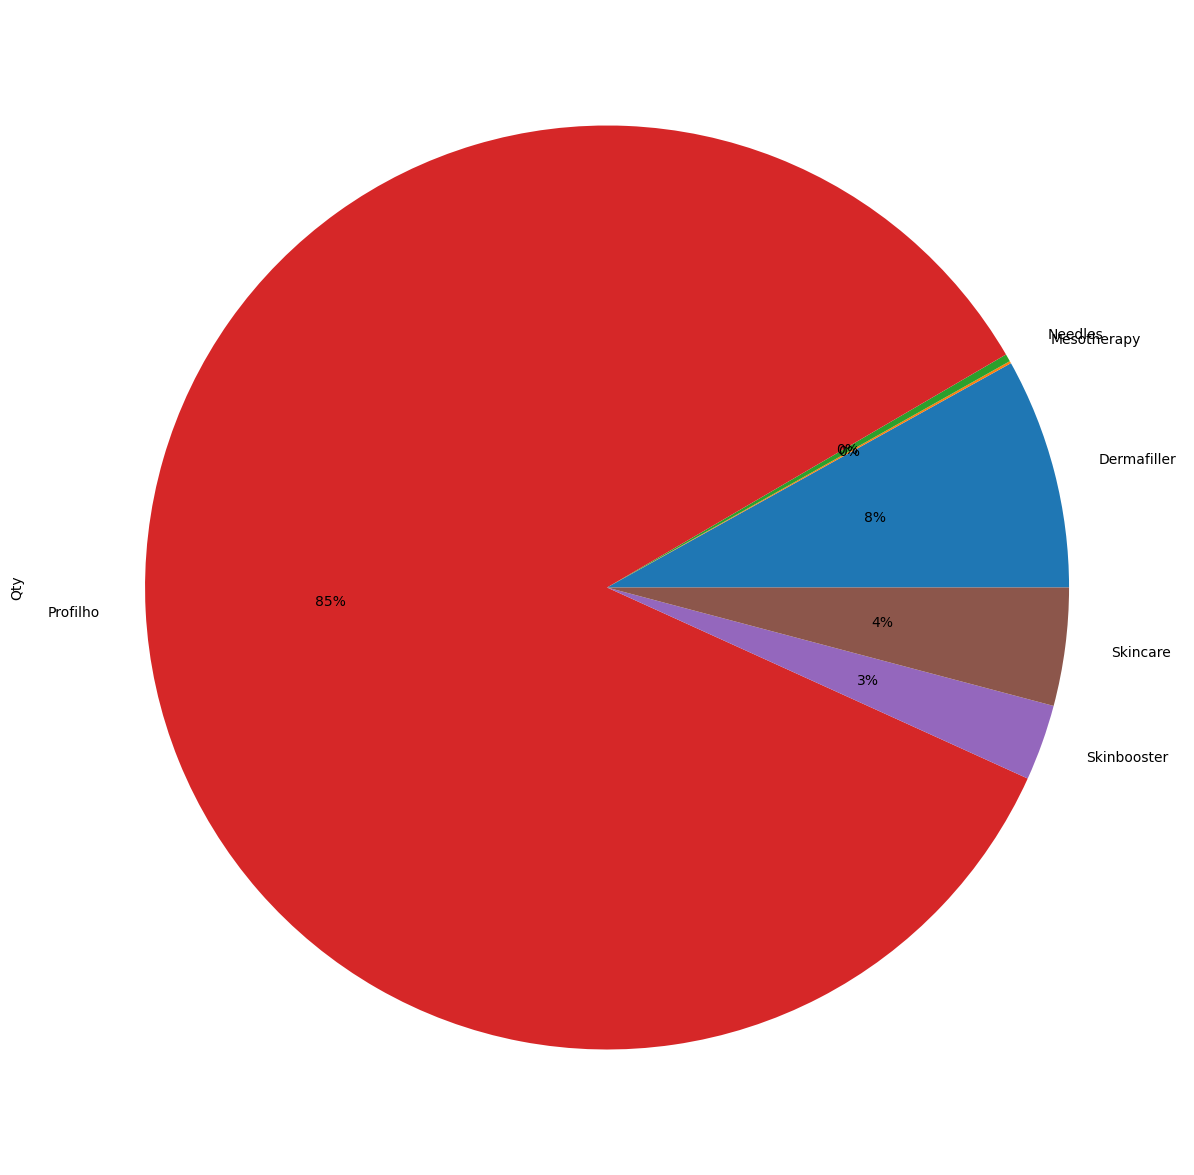

In [10]:
df_sales_products = df_sales.groupby(['Category']).sum().plot(kind='pie', y='Qty', autopct='%1.0f%%', legend=None, figsize=(15,15))

C:\Users\galea\AppData\Local\Temp\ipykernel_712\3604284173.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales_products = df_sales.groupby(['Location']).sum().plot(kind='pie', y='Qty', autopct='%1.0f%%', legend=None, figsize=(15,15))


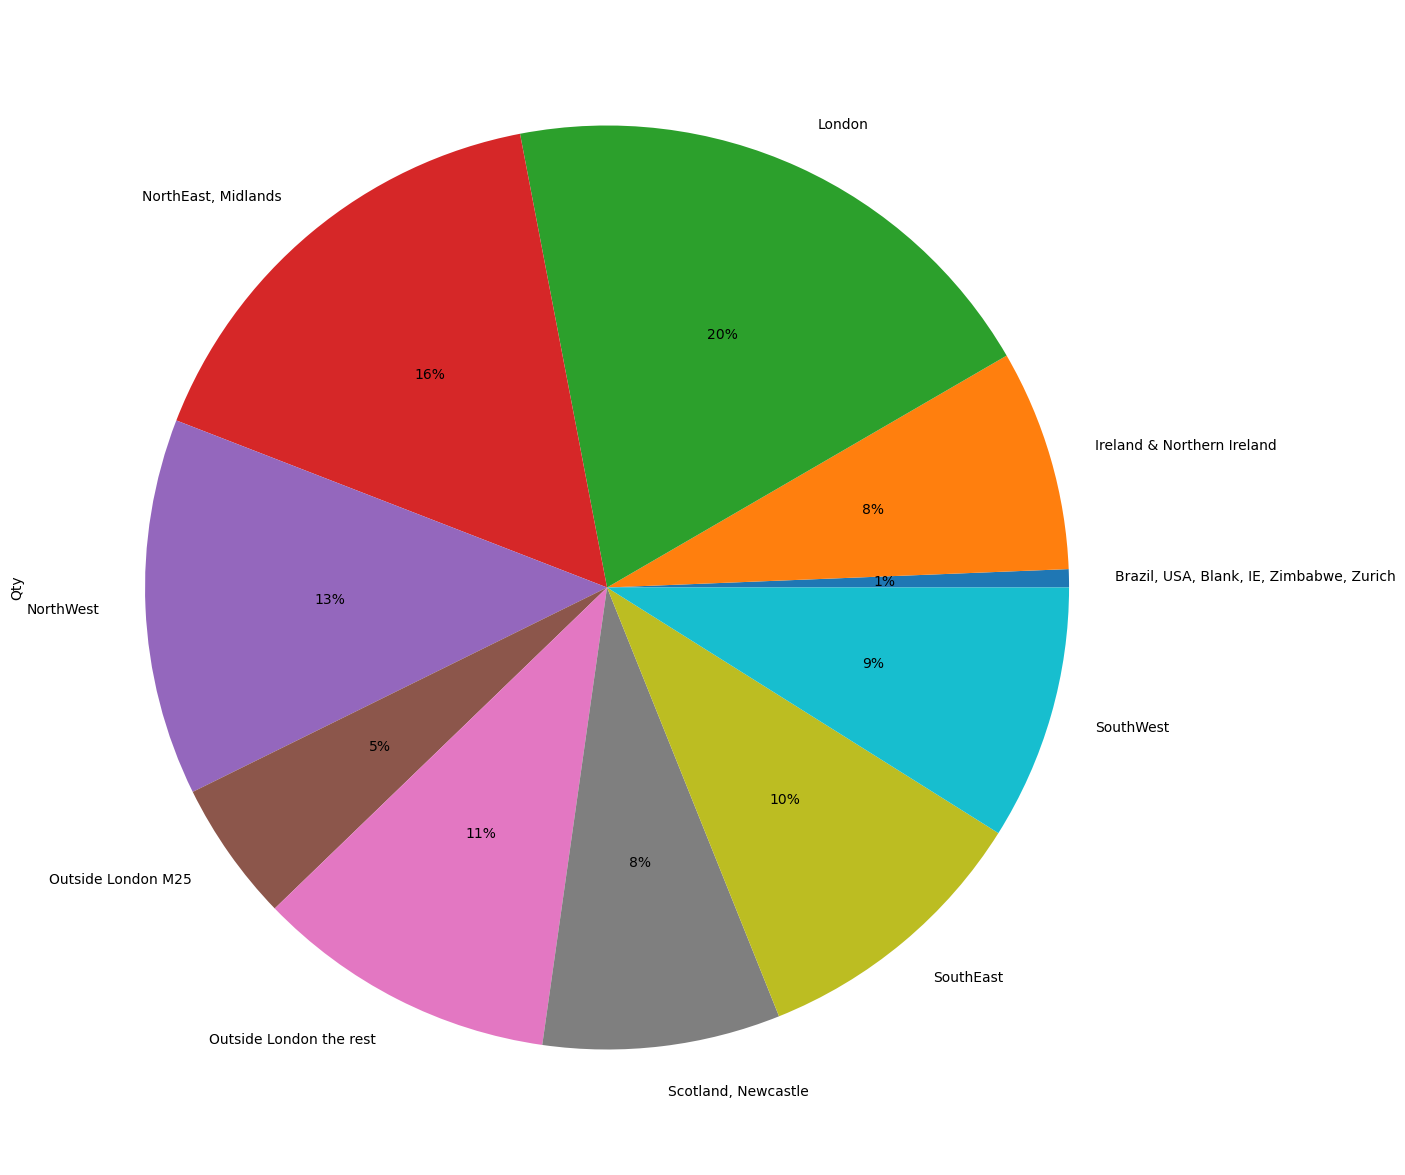

In [11]:
df_sales_products = df_sales.groupby(['Location']).sum().plot(kind='pie', y='Qty', autopct='%1.0f%%', legend=None, figsize=(15,15))

## Trend

In [12]:
df = df_sales[['Date', 'Qty']]

In [13]:
df = df.groupby(['Date'],as_index=False)['Qty'].agg("sum")
print(df)

        Date    Qty
0   1-1-2016     76
1   1-1-2017    328
2   1-1-2018   2328
3   1-1-2019   4948
4   1-1-2020   6204
..       ...    ...
72  1-9-2017   1234
73  1-9-2018   4642
74  1-9-2019   6613
75  1-9-2020  10034
76  1-9-2021  12261

[77 rows x 2 columns]


In [14]:
df['Date'] = pd.to_datetime(df.Date, format="%d-%m-%Y")
df = df.sort_values(by='Date')
df = df.set_index(df.Date)
df.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Qty    int64
dtype: object


,Qty
Date,
2015-11-01,9
2015-12-01,35
2016-01-01,76
2016-02-01,59
2016-03-01,144
...,...
2021-11-01,19099
2021-12-01,11719
2022-01-01,14598


Text(0.5, 1.0, 'Trend of the Time Series')

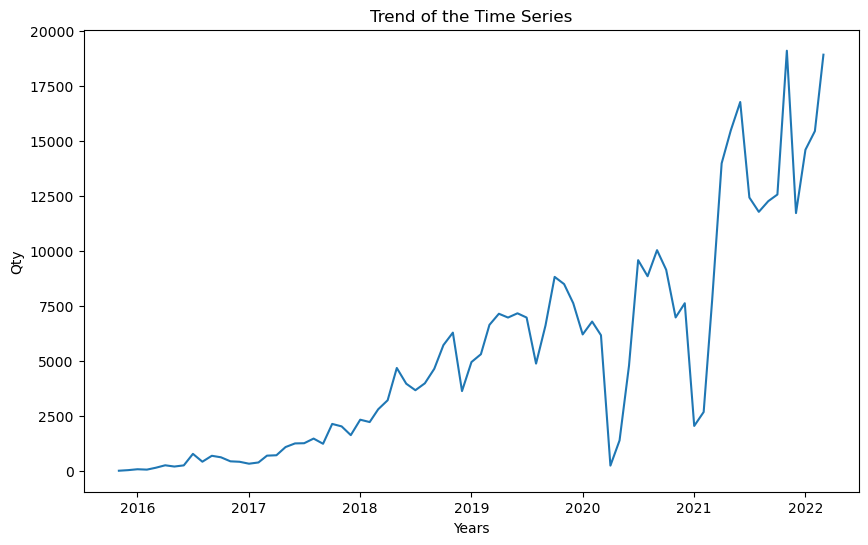

In [15]:
#To plot trend
plt.figure(figsize= (10,6))
plt.plot(df.index, df['Qty'])
plt.xlabel('Years')
plt.ylabel('Qty')
plt.title('Trend of the Time Series')

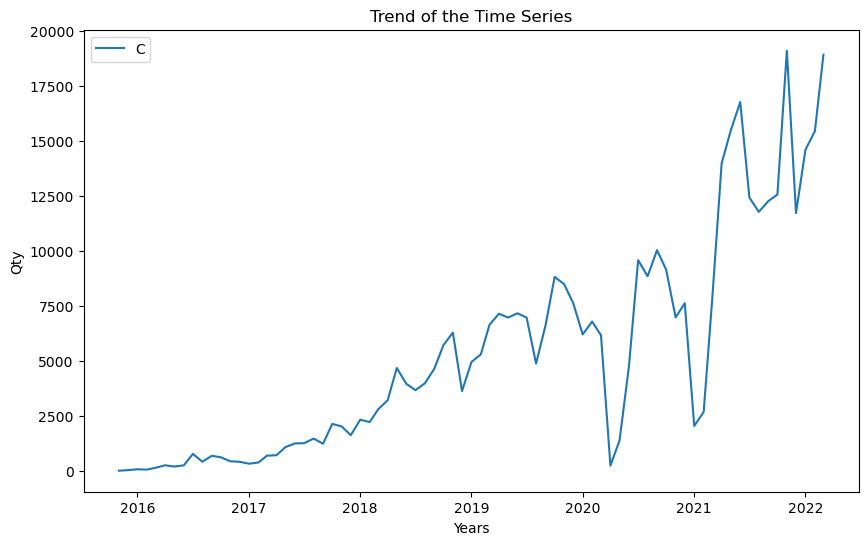

In [16]:
#To plot trend
plt.figure(figsize= (10,6))
plt.plot(df.index, df['Qty'])
plt.xlabel('Years')
plt.ylabel('Qty')
plt.title('Trend of the Time Series')
plt.legend('Category')

## Seasonality

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='Qty'>

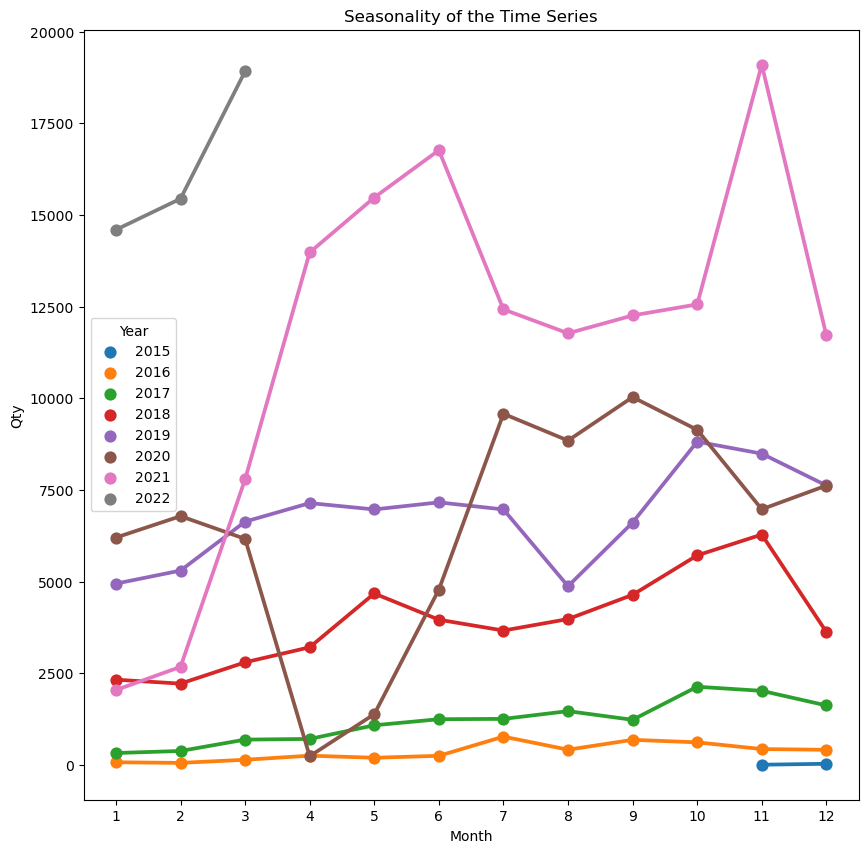

In [17]:
#To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Qty',hue='Year',data=df_temp)

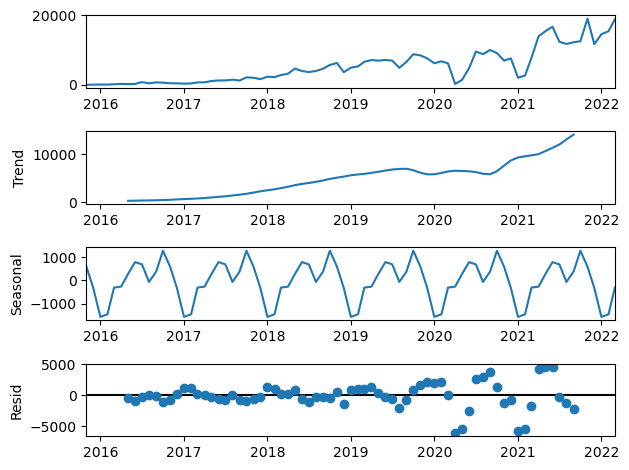

In [18]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

## Scatter

Text(0.5, 1.0, 'Year vs Qty')

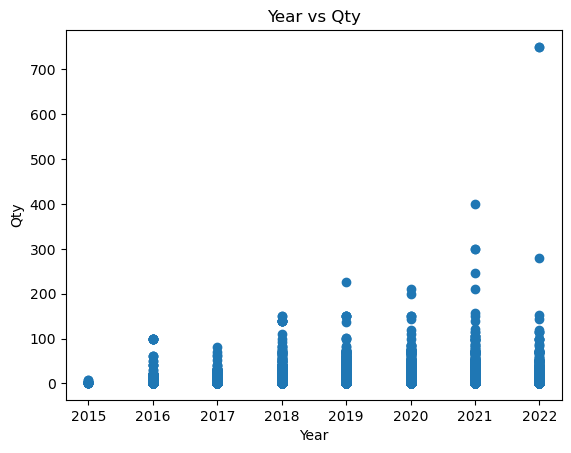

In [19]:
plt.scatter(df_sales.Year, df_sales.Qty)
plt.xlabel('Year')
plt.ylabel('Qty')
plt.title('Year vs Qty')

Text(0.5, 1.0, 'Month vs Qty')

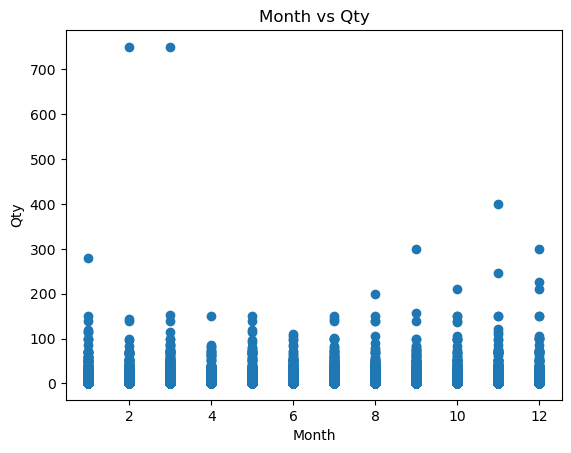

In [20]:
plt.scatter(df_sales.Month, df_sales.Qty)
plt.xlabel('Month')
plt.ylabel('Qty')
plt.title('Month vs Qty')

Text(0.5, 1.0, 'Quarter vs Qty')

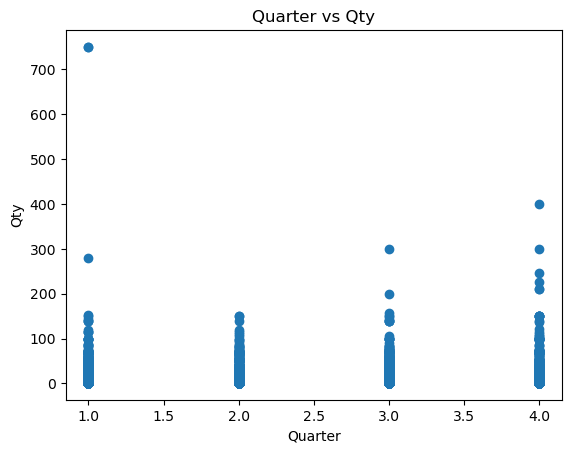

In [21]:
plt.scatter(df_sales.Quarter, df_sales.Qty)
plt.xlabel('Quarter')
plt.ylabel('Qty')
plt.title('Quarter vs Qty')

In [22]:
(df_sales['Category'].value_counts()/df_sales['Category'].count())*100

Profilho       67.011481
Dermafiller    16.036774
Skincare       11.125357
Skinbooster     4.762807
Needles         0.677487
Mesotherapy     0.386095
Name: Category, dtype: float64

In [23]:

# importing the modules
from tabulate import tabulate
import pandas as pd
  
# creating a DataFrame
dict = {'Category':['Profilho', 'Dermafiller ', 'Skincare', 'Skinbooster', 'Needles', 'Mesotherapy'],
        'Percentage':['67.01%', '16.03%', '11.13%', '4.76%', '0.68%', '0.39%']}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
print(tabulate(df, headers = 'keys', tablefmt = 'simple'))

    Category     Percentage
--  -----------  ------------
 0  Profilho     67.01%
 1  Dermafiller  16.03%
 2  Skincare     11.13%
 3  Skinbooster  4.76%
 4  Needles      0.68%
 5  Mesotherapy  0.39%


In [24]:
(df_sales['Product'].value_counts()/df_sales['Product'].count())*100

Injection 7             66.441809
Injection 10             4.414593
Injection 3              3.890087
Cream 2                  3.887173
Facemask                 3.777901
Injection 1              3.686112
Injection 5              3.351011
Injection 2              2.746372
Foundation 2             1.535637
Injection 6              1.269013
Injection 4              1.094178
Foundation 1             0.648348
Injection 8              0.569672
Make-up Remover          0.435631
Skin Booster Needles     0.380267
Cream 3                  0.359869
Injection 13             0.339472
Mesotherapy Needles      0.297220
Pills                    0.269538
Injection 14             0.157352
Injection 9              0.106358
sunblock                 0.097616
Injection 11             0.084504
Cream 4                  0.067020
Injection 12             0.046623
Cream 1                  0.046623
Name: Product, dtype: float64

In [25]:
# creating a DataFrame
dict = {'Product':['Injection 7', 'Injection 10', 'Injection 3', 'Cream 2', 'Facemask',
                   'Injection 1', 'Injection 5', 'Injection 2', 'Foundation 2', 'Injection 6',
                   'Injection 4', 'Foundation 1', 'Injection 8', 'Make-up Remover', 'Skin Booster Needles',
                   'Cream 3', 'Injection 13', 'Mesotherapy Needles', 'Pills', 'Injection 14',
                   'Injection 9', 'sunblock', 'Injection 11 ', 'Cream 4', 'Injection 12',
                   'Cream 1 '],
        'Percentage':['66.44%', '4.41%', '3.89%', '3.88%', '3.77%', 
                      '3.68%', '3.35%', '2.74%', '1.53%', '1.26%',
                      '1.09%', '0.64%', '0.56%', '0.43%', '0.38%',
                      '0.35%', '0.33%', '0.29%', '0.27%', '0.16%',
                      '0.11%', '0.10%', '0.08%', '0.07%', '0.05%',
                      '0.05%']}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
print(tabulate(df, headers = 'keys', tablefmt = 'simple'))

    Product               Percentage
--  --------------------  ------------
 0  Injection 7           66.44%
 1  Injection 10          4.41%
 2  Injection 3           3.89%
 3  Cream 2               3.88%
 4  Facemask              3.77%
 5  Injection 1           3.68%
 6  Injection 5           3.35%
 7  Injection 2           2.74%
 8  Foundation 2          1.53%
 9  Injection 6           1.26%
10  Injection 4           1.09%
11  Foundation 1          0.64%
12  Injection 8           0.56%
13  Make-up Remover       0.43%
14  Skin Booster Needles  0.38%
15  Cream 3               0.35%
16  Injection 13          0.33%
17  Mesotherapy Needles   0.29%
18  Pills                 0.27%
19  Injection 14          0.16%
20  Injection 9           0.11%
21  sunblock              0.10%
22  Injection 11          0.08%
23  Cream 4               0.07%
24  Injection 12          0.05%
25  Cream 1               0.05%


In [26]:
(df_sales['Location'].value_counts()/df_sales['Location'].count())*100

NorthEast, Midlands                         19.568448
NorthWest                                   15.401539
London                                      14.281135
SouthEast                                   10.915555
Scotland, Newcastle                         10.417274
Outside London the rest                      9.834489
SouthWest                                    9.556210
Outside London M25                           4.783204
Ireland & Northern Ireland                   4.678303
Brazil, USA, Blank, IE, Zimbabwe, Zurich     0.563844
Name: Location, dtype: float64

In [27]:
# creating a DataFrame
dict = {'Location':['NorthEast, Midlands ', 'NorthWest', 'London', 'SouthEast', 'Scotland, Newcastle',
                   'Outside London the rest', 'SouthWest', 'Outside London M25', 'Ireland & Northern Ireland', 'Brazil, USA, Blank, IE, Zimbabwe, Zurich'],
        'Percentage':['19.57%', '15.40%', '14.28%', '10.92%', '10.42%', 
                      '9.83%', '9.56%', '4.78%', '4.68%', '0.56%']}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
print(tabulate(df, headers = 'keys', tablefmt = 'simple'))

    Location                                  Percentage
--  ----------------------------------------  ------------
 0  NorthEast, Midlands                       19.57%
 1  NorthWest                                 15.40%
 2  London                                    14.28%
 3  SouthEast                                 10.92%
 4  Scotland, Newcastle                       10.42%
 5  Outside London the rest                   9.83%
 6  SouthWest                                 9.56%
 7  Outside London M25                        4.78%
 8  Ireland & Northern Ireland                4.68%
 9  Brazil, USA, Blank, IE, Zimbabwe, Zurich  0.56%


In [28]:
df_sales_cat = df_sales[df_sales['Category']!='Profilho']

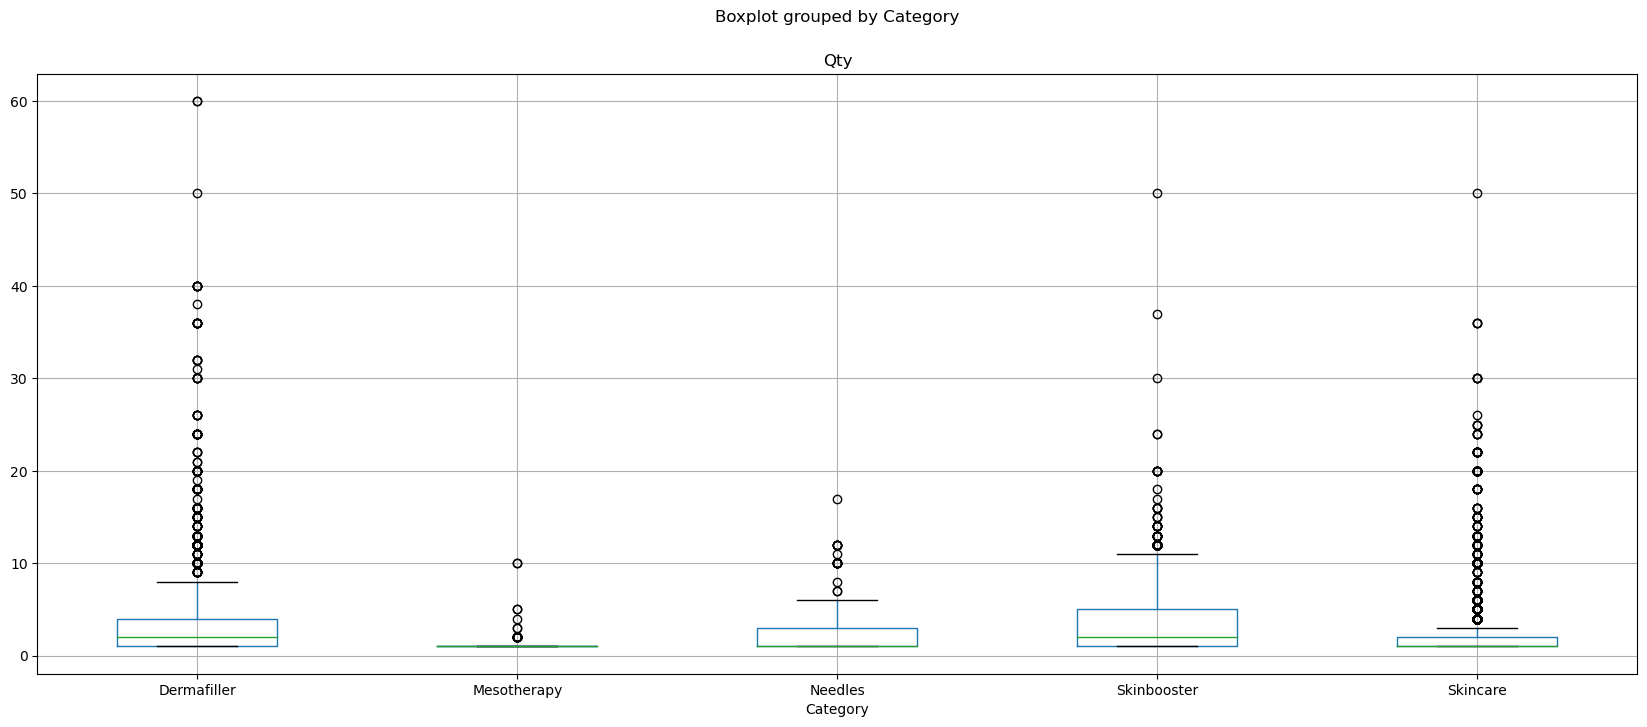

In [29]:
df_sales_cat.boxplot('Qty', by='Category', figsize=(20,8))
plt.title('Qty')
plt.show()

In [30]:
df_sales_prod = df_sales[df_sales['Product']!='Injection 7']

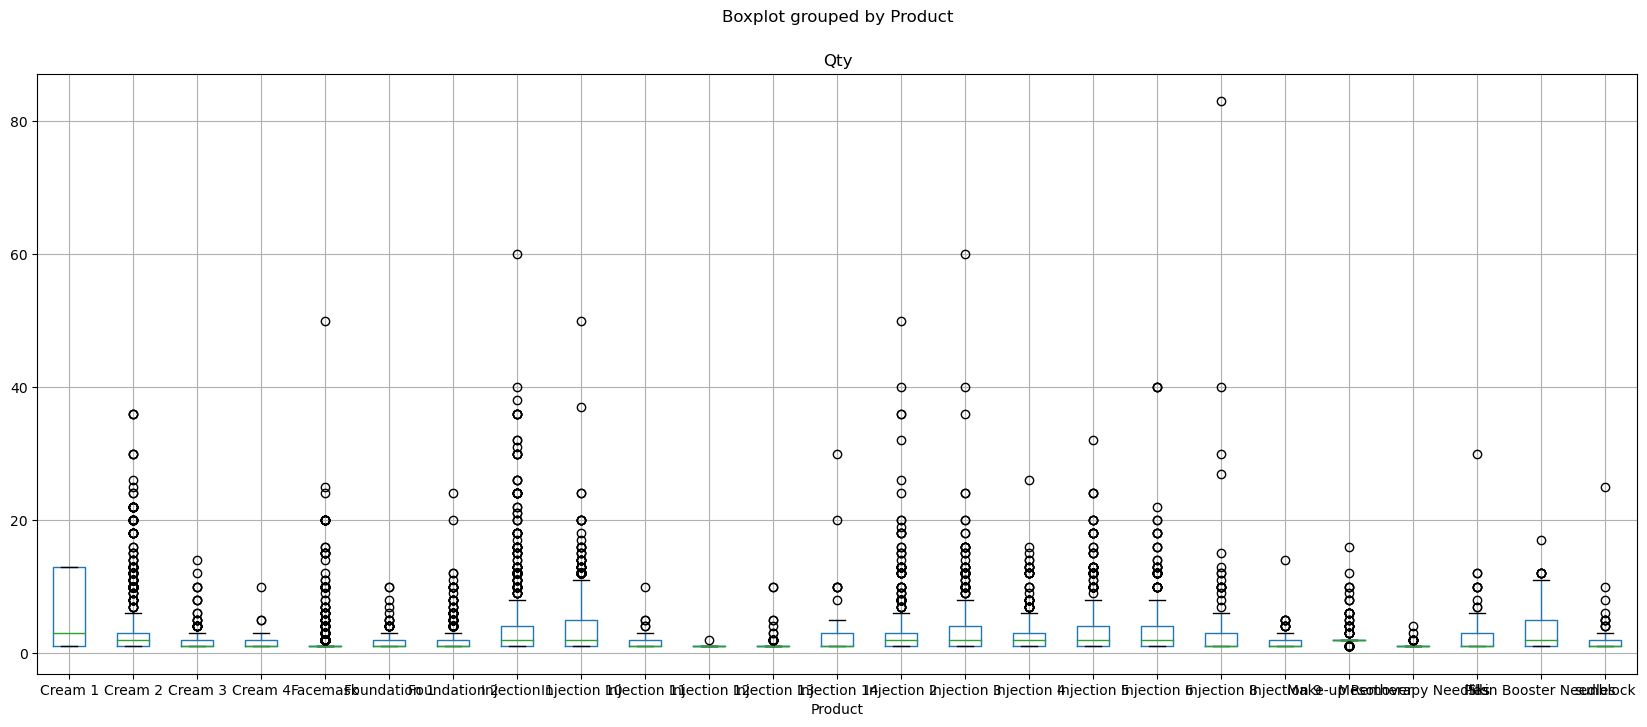

In [31]:
df_sales_prod.boxplot('Qty', by='Product', figsize=(20,8))
plt.title('Qty')
plt.show()